 <center> <h1> Introducción - Seaborn </h1></center>
    
- Docente: Edwin Jahir Rueda Rojas
- Email: edruedaro@uide.edu.ec

[Seaborn](https://seaborn.pydata.org/) es una librería de visualización en python basada en [matplotlib](https://matplotlib.org/) e integrada ampliamente con [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html). Básicamente es una capa superior a matplotlib la cual ya cuenta con una interfaz gráfica mas atractiva por defecto (los llamados [temas](https://seaborn.pydata.org/tutorial/aesthetics.html))

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_theme()

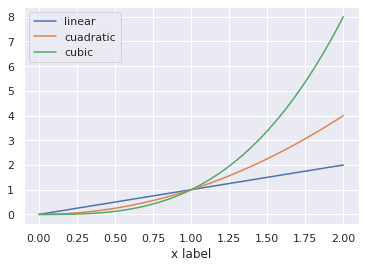

In [96]:
x = np.linspace(0, 2, 100)
sns.lineplot(x=x, y=x, label="linear")
sns.lineplot(x=x, y=x**2, label="cuadratic")
sns.lineplot(x=x, y=x**3, label="cubic")

plt.xlabel("x label"); # podemos editar la figura con matplotlib

La ventaja de seaborn es que se integra muy bien con pandas, agregando mas información a nuestro gráfico:

In [97]:
np.random.seed(4)
metros_cuadrados = np.random.randint(50, 150, size=10)
habitaciones = np.random.randint(1, 5, size=10)
precio = metros_cuadrados * np.random.randint(800, 1500, size=10)

df = pd.DataFrame({
    "metro_cuadrado": metros_cuadrados,
    "numero_habitaciones": habitaciones,
    "precio": precio
})

df


,metro_cuadrado,numero_habitaciones,precio
0,96,4,130944
1,105,4,124635
2,119,2,95200
3,51,1,50133
4,137,1,182621
5,122,3,115778
6,100,1,122200
7,59,3,77231
8,108,3,138888
9,144,3,123264


In [98]:
sns.scatterplot?

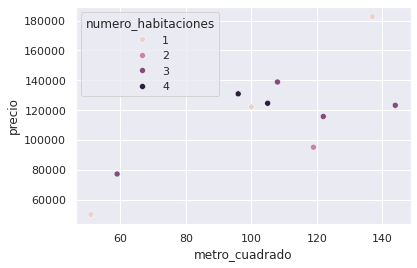

In [99]:
sns.scatterplot(x="metro_cuadrado",
             y="precio",
             hue="numero_habitaciones",
             data=df);

<h3>Tipos de gráficos</h3>

Seaborn ofrece una capa mas abstracta de gráficos, los cuales se pueden dividir en tres categorias: relacionales, distribución, categoricos.
<img src="./images/seaborn_plots.png" width="80%">

Exploremos [`sns.scatterplot(**args)`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn-scatterplot)

In [100]:
tips = sns.load_dataset("tips")
print(f"Dimensión del dataset: {tips.shape}")
tips.head()


Dimensión del dataset: (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


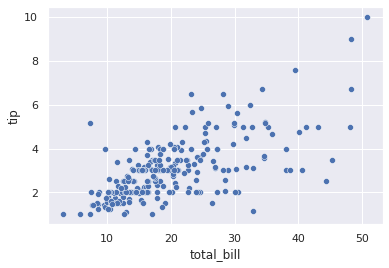

In [101]:
sns.scatterplot(data=tips, x="total_bill", y="tip");

Podemos facilmente generar otras relaciones:

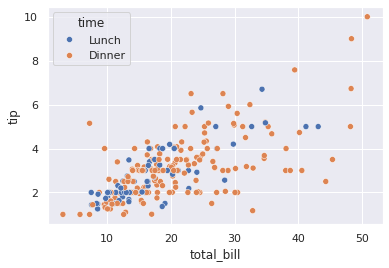

In [36]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time");

También podemos modificar/ajustar nuestro gráfico:

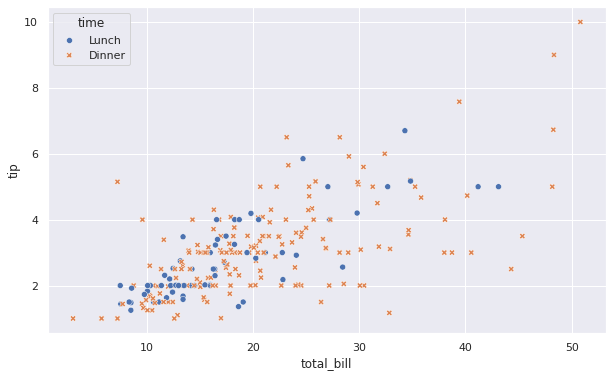

In [42]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=tips,
                x="total_bill",
                y="tip",
                hue="time",
                style="time");

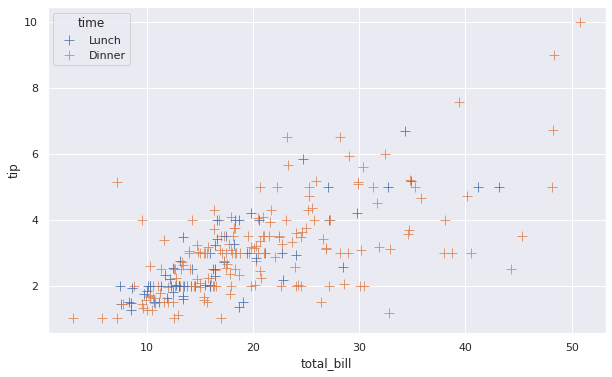

In [107]:
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=tips,
                x="total_bill",
                y="tip",
                hue="time",
                s=100,
                marker="+");

podemos inclusive crear subplots definidos por columnas de nuestro dataset:

In [108]:
sns.relplot?

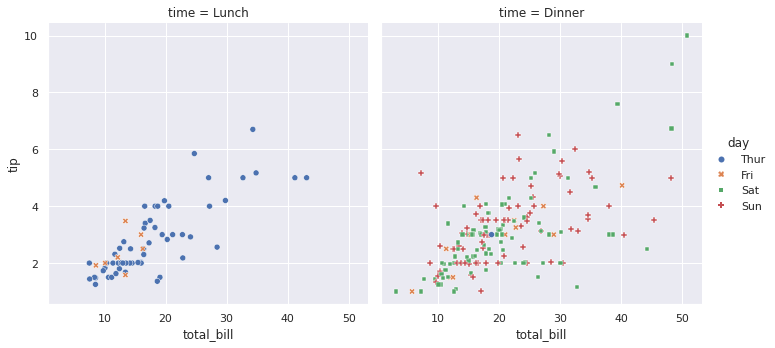

In [109]:
sns.relplot(
    data=tips, x="total_bill", y="tip",
    col="time", hue="day", style="day",
    kind="scatter"
);

Exploremos [`sns.histplot`](https://seaborn.pydata.org/generated/seaborn.histplot.html)

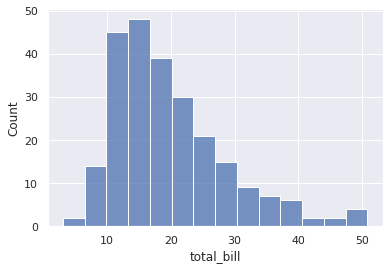

In [54]:
sns.histplot(data=tips, x="total_bill");

o si definimos los datos en el eje $y$

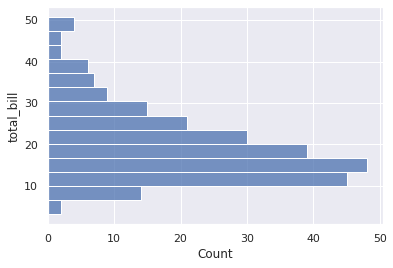

In [53]:
sns.histplot(data=tips, y="total_bill");

podemos agregar características que nos brinda seaborn, tales con el [KDE](https://scikit-learn.org/stable/modules/density.html#density-estimation-histograms):

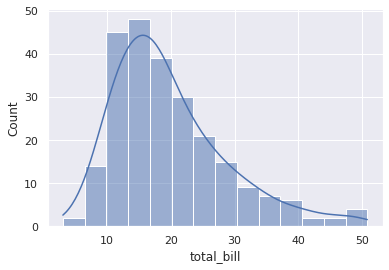

In [55]:
sns.histplot(data=tips, x="total_bill", kde=True);

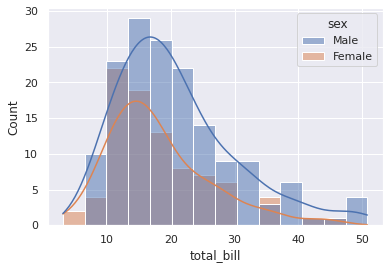

In [61]:
sns.histplot(data=tips, x="total_bill", kde=True, hue="sex");

Facilmente podemos crear un gráfico de barras apilado:

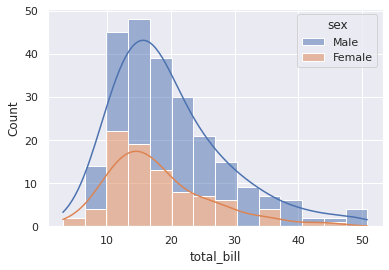

In [63]:
sns.histplot(data=tips,
             x="total_bill",
             kde=True,
             hue="sex",
             multiple="stack");

Exploremos el [`sns.rugplot`](https://seaborn.pydata.org/generated/seaborn.rugplot.html):

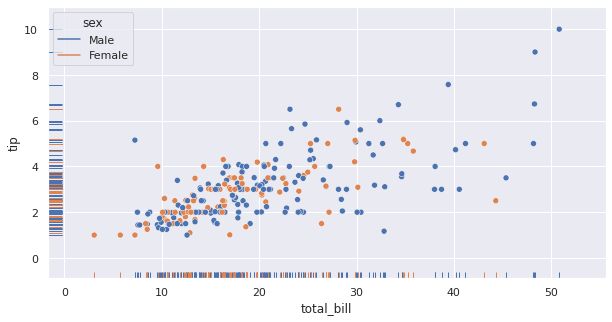

In [71]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="sex")
sns.rugplot(data=tips, x="total_bill", y="tip", hue="sex");

Exploremos [`sns.stripplot`](https://seaborn.pydata.org/generated/seaborn.stripplot.html) el cual nos permite utilizar el gráfico `scatterplot` con datos categoricos mediante el uso de `jitter`/fluctuación

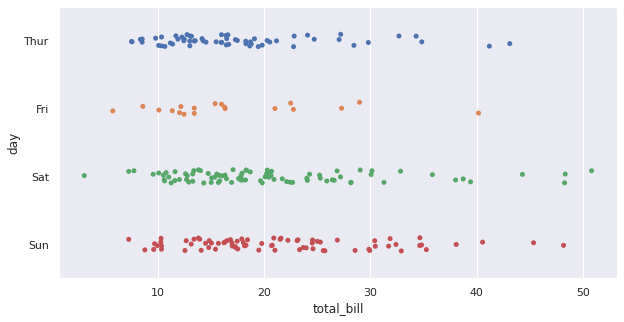

In [110]:
plt.figure(figsize=(10,5))
sns.stripplot(data=tips, x="total_bill", y="day", hue="day");

Desactivemos el uso de `jitter` y notemos como se sobreponen los datos, dando una vista errada de que el conjunto de datos es menor:

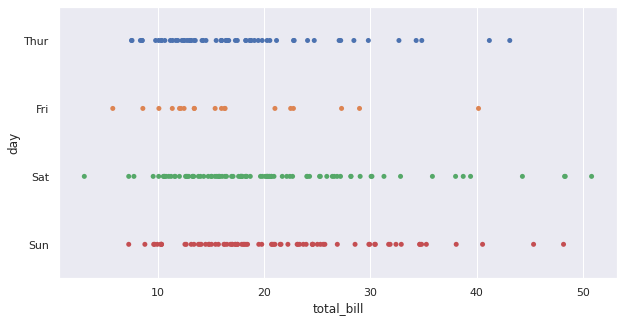

In [111]:
plt.figure(figsize=(10,5))
sns.stripplot(data=tips, x="total_bill", y="day", hue="day", jitter=False);

Otro gráfico útil es el [`swarmplot`](https://seaborn.pydata.org/generated/seaborn.swarmplot.html) el cual permite organizar los datos de tal manera que nose sobrepongan

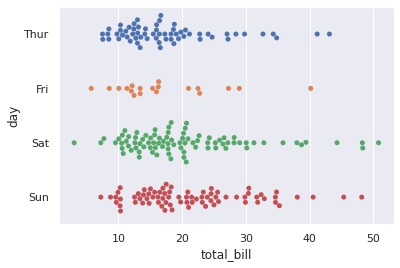

In [114]:
sns.swarmplot(data=tips, x="total_bill", y="day",hue="day");

/home/edwin/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/edwin/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/edwin/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/edwin/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/edwin/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarni

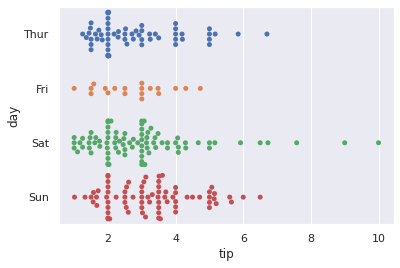

In [115]:
sns.swarmplot(data=tips, x="tip", y="day", hue="day");

Exploremos los gráficos de cajas [`sns.boxplots`](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

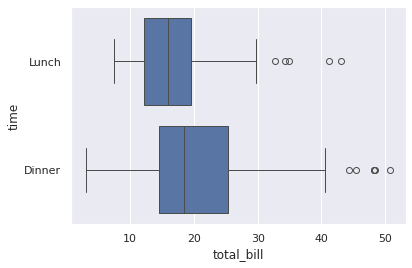

In [82]:
sns.boxplot(
    data=tips, x="total_bill", y="time"
);

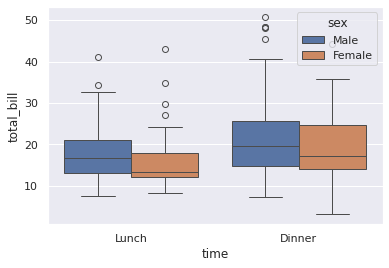

In [84]:
sns.boxplot(
    data=tips, y="total_bill", x="time", hue="sex"
);

o implementar el gráfico [`violinplot`](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

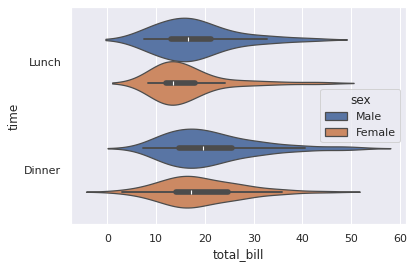

In [117]:
sns.violinplot(
    data=tips, x="total_bill", y="time", hue="sex"
);

Un método rápido de explorar la relación de nuestros datos

In [119]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


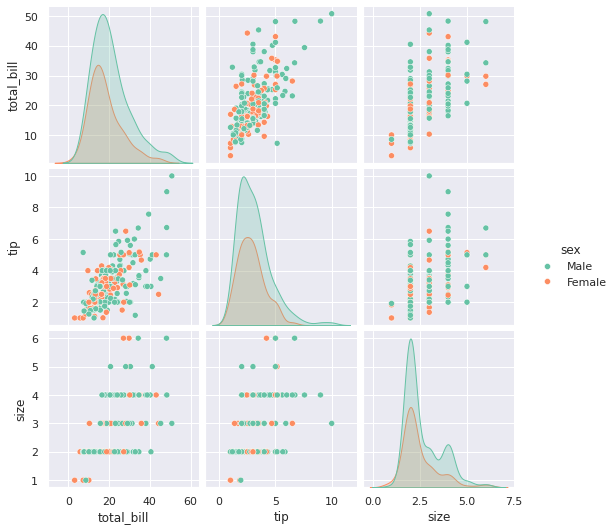

In [89]:
g = sns.pairplot(data=tips, hue="sex", palette="Set2", diag_kind="kde", height=2.5)

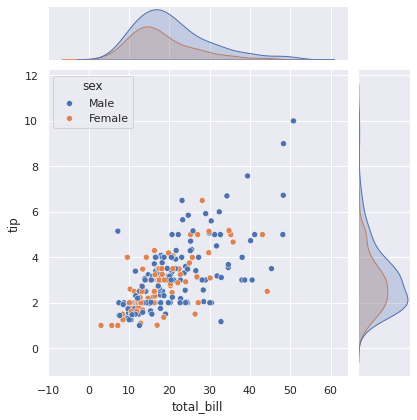

In [93]:
g = sns.jointplot(data=tips, x="total_bill", y="tip", hue="sex")